In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls ../datasets/international_football_results/

goalscorers.csv  results.csv  shootouts.csv


In [38]:
!head -n 10 ../datasets/international_football_results/results.csv

date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,FALSE
1873-03-08,England,Scotland,4,2,Friendly,London,England,FALSE
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,FALSE
1875-03-06,England,Scotland,2,2,Friendly,London,England,FALSE
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,FALSE
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,FALSE
1877-03-03,England,Scotland,1,3,Friendly,London,England,FALSE
1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,FALSE
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,FALSE


In [3]:
df_results = pd.read_csv("../datasets/international_football_results/results.csv")

df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [44]:
df_results.isnull().sum()

date           0
home_team      0
away_team      0
home_score    48
away_score    48
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [53]:
# NaN values for matches are for this 48 games 2022 year

df_results[df_results.home_score.isnull()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44104,2022-11-20,Qatar,Ecuador,NaN,NaN,FIFA World Cup,Al Khor,Qatar,False
44105,2022-11-21,Senegal,Netherlands,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44106,2022-11-21,England,Iran,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44107,2022-11-21,United States,Wales,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44108,2022-11-22,Argentina,Saudi Arabia,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
44109,2022-11-22,Mexico,Poland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44110,2022-11-22,Denmark,Tunisia,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44111,2022-11-22,France,Australia,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True
44112,2022-11-23,Germany,Japan,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44113,2022-11-23,Spain,Costa Rica,NaN,NaN,FIFA World Cup,Doha,Qatar,True


In [73]:
def get_intermediate(df):
    global _df
    _df = df
    return df

def float_to_int(df, cols):
    for col in cols:
        df[col] = df[col].astype("Int64")
    return df

def preprocess_international_football_results(df):
    df = (
        df
        .assign(date = pd.to_datetime(df.date, format='%Y-%m-%d'))
        .pipe(get_intermediate)
        .assign(year = _df.date.dt.year)
        .assign(result = np.sign((df.home_score - df.away_score)).astype('Int64'))
        .pipe(float_to_int, ['home_score', 'away_score'])
    )
    
    return df

In [74]:
df_results_preproc = preprocess_international_football_results(df_results)

df_results_preproc.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1


array([[<AxesSubplot: title={'center': 'result'}>]], dtype=object)

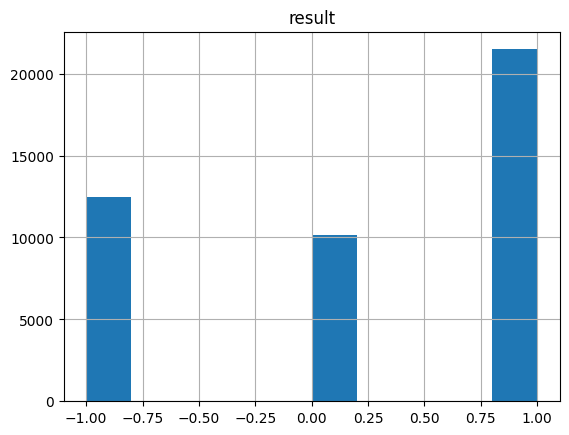

In [75]:
df_results_preproc.hist('result')

In [76]:
df_results_preproc.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
44147,2022-12-01,Canada,Morocco,<NA>,<NA>,FIFA World Cup,Doha,Qatar,True,2022,<NA>
44148,2022-12-02,Serbia,Switzerland,<NA>,<NA>,FIFA World Cup,Doha,Qatar,True,2022,<NA>
44149,2022-12-02,Cameroon,Brazil,<NA>,<NA>,FIFA World Cup,Lusail,Qatar,True,2022,<NA>
44150,2022-12-02,Ghana,Uruguay,<NA>,<NA>,FIFA World Cup,Al Wakrah,Qatar,True,2022,<NA>
44151,2022-12-02,South Korea,Portugal,<NA>,<NA>,FIFA World Cup,Al Rayyan,Qatar,True,2022,<NA>


In [85]:
df_results_preproc.isnull().sum()

date           0
home_team      0
away_team      0
home_score    48
away_score    48
tournament     0
city           0
country        0
neutral        0
year           0
result        48
dtype: int64

Text(0.5, 1.0, 'Jogos por Ano')

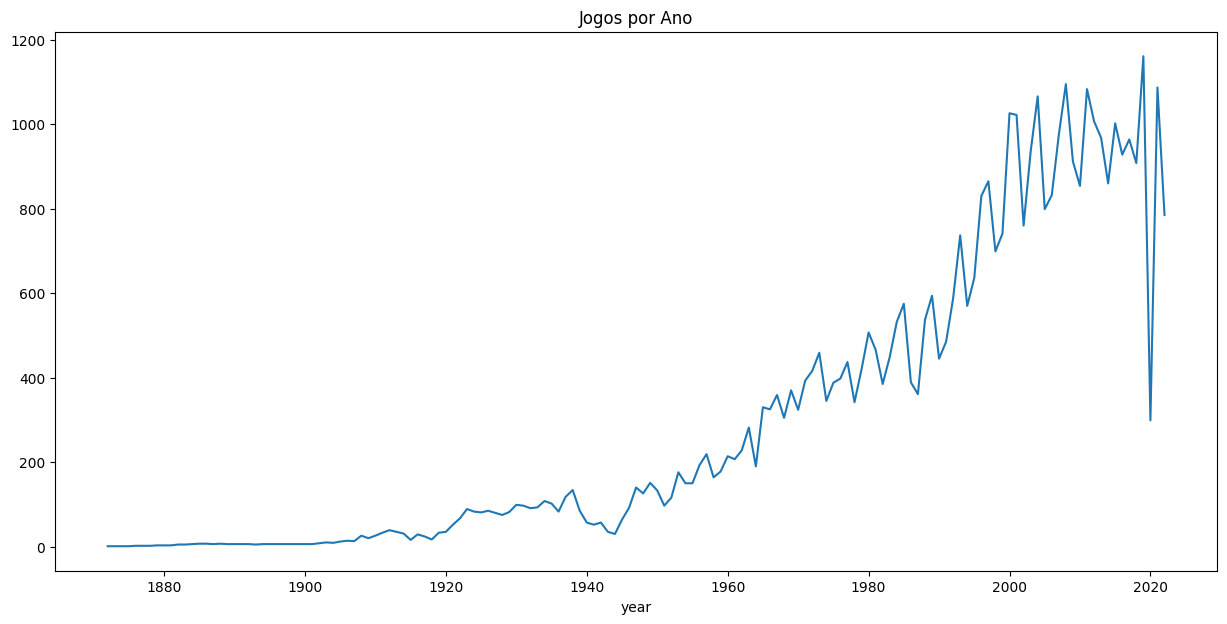

In [86]:
(
    df_results_preproc
    .groupby('year')
    ['result']
    .count()
    .plot(figsize=(15,7))
)
plt.title("Jogos por Ano")

In [88]:
df_results_preproc.to_csv("../datasets/international_football_results/results_preprocessed.csv")

In [90]:
df_results_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44152 entries, 0 to 44151
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44152 non-null  datetime64[ns]
 1   home_team   44152 non-null  object        
 2   away_team   44152 non-null  object        
 3   home_score  44104 non-null  Int64         
 4   away_score  44104 non-null  Int64         
 5   tournament  44152 non-null  object        
 6   city        44152 non-null  object        
 7   country     44152 non-null  object        
 8   neutral     44152 non-null  bool          
 9   year        44152 non-null  int64         
 10  result      44104 non-null  Int64         
dtypes: Int64(3), bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 3.5+ MB


In [89]:
!ls ../datasets/international_football_results/

goalscorers.csv  results.csv  results_preprocessed.csv	shootouts.csv
